<a href="https://colab.research.google.com/github/divy9881/prominent-colors-detector/blob/master/notebook/Prominent_Colors_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Define hyper-parameters
root = "./drive/My Drive/Colab Notebooks/"

In [9]:
# Core-engine functions
from tensorflow import io, image
from tensorflow.keras import backend
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

class ImageProminentColor:
  def __init__(self, filepath: str):
    image_string = io.read_file(filepath)
    self.image_object = image.decode_image(image_string, channels=3)
    self.flattened_image_object = self.flatten_image()
    self.total_pixels = self.flattened_image_object.shape[0]

  def flatten_image(self):
    height = self.image_object.shape[0]
    width = self.image_object.shape[1]
    channels = self.image_object.shape[2]
    return backend.reshape(self.image_object, shape = (height*width, channels))

  def cluster_image_colors(self, clusterer, number_of_dominent_colors = 5):
    clusterer = clusterer(n_clusters = number_of_dominent_colors)
    self.cluster = clusterer.fit(self.flattened_image_object)
    return self.cluster.cluster_centers_, self.cluster.labels_

  def get_prominent_colors(self, clusterer, number_of_dominent_colors = 5):
    centroids, pixel_labels = self.cluster_image_colors(clusterer, number_of_dominent_colors)
    colors = []
    for i in set(pixel_labels):
      count = 0
      for pixel_label in pixel_labels:
        if pixel_label == i:
          count += 1
      colors.append([centroids[i], count ])
      
    colors.sort(key = lambda a : -a[1])
    for i in range(len(colors)):
      colors[i][1] = "{0} of {1}".format(str(colors[i][1]), str(self.total_pixels))
    return colors

  def get_image_plot(self, filepath):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    r_vals = self.flattened_image_object[:, 0:1]
    g_vals = self.flattened_image_object[:, 1:2]
    b_vals = self.flattened_image_object[:, 2:3]
  
    ax.scatter(r_vals, g_vals, b_vals, c="red")

    ax.set_xlabel('Red (R)')
    ax.set_ylabel('Green (G)')
    ax.set_zlabel('Blue (B)')

    ax.set_xlabel('Red (R)')
    ax.set_ylabel('Green (G)')
    ax.set_zlabel('Blue (B)')

    plt.savefig(filepath)
    plt.show()

  def get_color_plot(self, filepath):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    centroid_r_vals = self.cluster.cluster_centers_[:, 0:1]
    centroid_g_vals = self.cluster.cluster_centers_[:, 1:2]
    centroid_b_vals = self.cluster.cluster_centers_[:, 2:3]

    marker_size=1000
    ax.scatter(centroid_r_vals, centroid_g_vals, centroid_b_vals, c="green", s = marker_size)

    ax.set_xlabel('Red (R)')
    ax.set_ylabel('Green (G)')
    ax.set_zlabel('Blue (B)')

    plt.savefig(filepath)
    plt.show()

[[array([254.6386927 , 254.7229472 , 254.63391896]), '102226 of 140640'], [array([50.30585755, 50.58513497, 50.30164111]), '24191 of 140640'], [array([103.5686564 , 161.14420305,  93.71848415]), '14223 of 140640']]


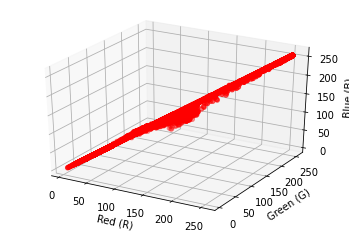

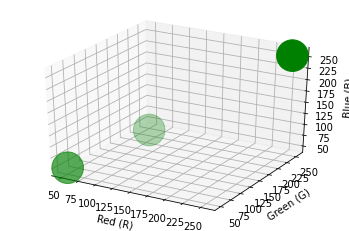

In [14]:
from tensorflow.keras.utils import get_file

file = get_file("pngtree-colorful-bright-smoke-texture-background-image_312909.jpg", "https://png.pngtree.com/thumb_back/fh260/background/20190903/pngtree-colorful-bright-smoke-texture-background-image_312909.jpg")

image_color = ImageProminentColor(root+"nodejs.png")
print(image_color.get_prominent_colors(KMeans, 3))

image_color.get_image_plot(root+"nodejs_image.png")
image_color.get_color_plot(root+"nodejs_color.png")